# QF 627 Programming and Computational Finance
## Individual Assessment

***

> Good evening, Team 👋

> This assessment is prepared so that you may review what you have learned on the course. You can find the answers from the lessons and from the scripts of each lesson that you have received throughout the course. Please do not feel yourselves to be under pressure. `Read each question carefully and answer accordingly`.

> Using Python in real-world financial data analysis does not mean simply executing a single step of an independent chunk of code. It requires a chain of lines of codes with a sharp logical progression. To give you a good exercise in real-world practice, the questions here, just like all the lessons and exercise problem sets, require you to go through `inter-related` and `logically deduced lines of programming`.

***

> Below are 10 questions. Each question asks you to program a sequence of codes that lead to an answer. First `ensure you fully understand the question`, in order not to overlook essential processes and answers. When questions ask for answers in addition to lines of codes, provide them using a markdown cell.

***

> Be sure to submit your work before the deadline: `9:35pm tonight, November 7, 2023`. It is an open-book exercise, and is also a timed task. To be fair to all students, a late submission will incur a point reduction.

> Please note `your last name` for `naming your submission` file (e.g., `Roh.ipynb`)

> If you find that you cannot answer a question, it would be wise to move on to another question that you can answer, and to finish that one first. `Make the best use of the time available`. If you cannot fully answer all the questions, then do as much as you can.

***

> Under a relative grading scheme, not everyone can receive an A grade for the course. This is school policy. If you find the questions easy, that does not guarantee your good final performance. If you find the questions a bit difficult, that is so that you may be given a valid and fair assessment. `It does not mean that you are failing`.

***

> Rather than feeling pressured by the assessment, I hope you will enjoy the opportunity presented by the hands-on exercise. You will notice that `answering each question will further consolidate your learning`.

***

> I wish you the best for your individual assessment 🤞

***

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [103]:
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation, DBSCAN
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold

import warnings
warnings.filterwarnings("ignore")

import datetime as dt

In [1]:
# Our standardized printing options

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

np.set_printoptions(precision = 3)

pd.set_option("display.float_format", lambda x: "%.3f" % x)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

List of Questions

    IMPORTANT NOTE: 

### <font color = purple> <center> One of the key aspects of the current assessment involves data wrangling. 

### <font color = purple> <center> Please ensure that you correctly wrangle your data to obtain valid answers.

### <font color = purple> <center> When using a function, please write the function within the current script.

## 👇 Questions 1 and 2: As a member of the Quantitative Investing Strategies (QIS) team at a leading investment bank on the buy side, you are tasked with the daily quantitative analysis and research of portfolio performances. 

## You have been provided with a dataset that includes daily returns metric for 26 portfolios, each employing different trading strategies. These portfolios are codenamed Alpha_A through Alpha_Z. 

## In your research, you are focusing on two critical questions that will aid in the risk assessment and strategic alignment of investment portfolios.

###  <font color = blue> 👉 Questions 1 </font>. 

### Your task is to use k-means clustering (set random_state at 111) to:

> (1) Identify the optimal number of clusters based on the within-cluster sum of squares (WSS) using an elbow chart.

> (2) Instead of estimating by sight (eye-balling), you should determine the value of k where the decrease in Within-Cluster Sum of Squares (WSS) — compared to the WSS when k = 2— falls below 45%. Any number of clusters that results in a WSS reduction rate less than 45% relative to k = 2 should be excluded from consideration.

```python
# HINT: You may calculate the percentage reduction in WSS

percentage_reduction = [0] * 2  # There is no reduction for the first two points

for i in range(2, len(wss)):
    reduction = (wss[i-2] - wss[i]) / wss[i-2] * 100
    percentage_reduction.append(reduction)

```

> (3) Determine which portfolios belong to each identified cluster based on the optimal number of clusters determined in step 2.

### Make sure to provide the lines of code that lead to your answers, and give your answers in `each of the cells below`.

In [9]:
dataset = pd.read_csv("qs12.csv", index_col=0)

### <font color = red> Answer 1.1 is presented in the cell below: </font>

In [10]:
print("Missing Values? =", 
      dataset
          .isnull()
          .values
          .any()
     )

Missing Values? = False


In [13]:
returns =\
(
    dataset
    .mean() 
    * 252
)

returns = pd.DataFrame(returns)

returns.columns = ["Returns"]

In [15]:
returns["Volatility"] =\
(    
     dataset
    .std() 
    * np.sqrt(252)
)

In [17]:
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler().fit(data)

In [20]:
rescaledDataset = pd.DataFrame(scaler.fit_transform(data),columns = returns.columns, index = returns.index)
rescaledDataset.head()

,Returns,Volatility
Alpha_A,-0.286,-0.696
Alpha_B,0.048,-0.611
Alpha_C,-0.563,-0.731
Alpha_D,0.088,-0.330
Alpha_E,-0.560,-0.654


In [21]:
X = rescaledDataset

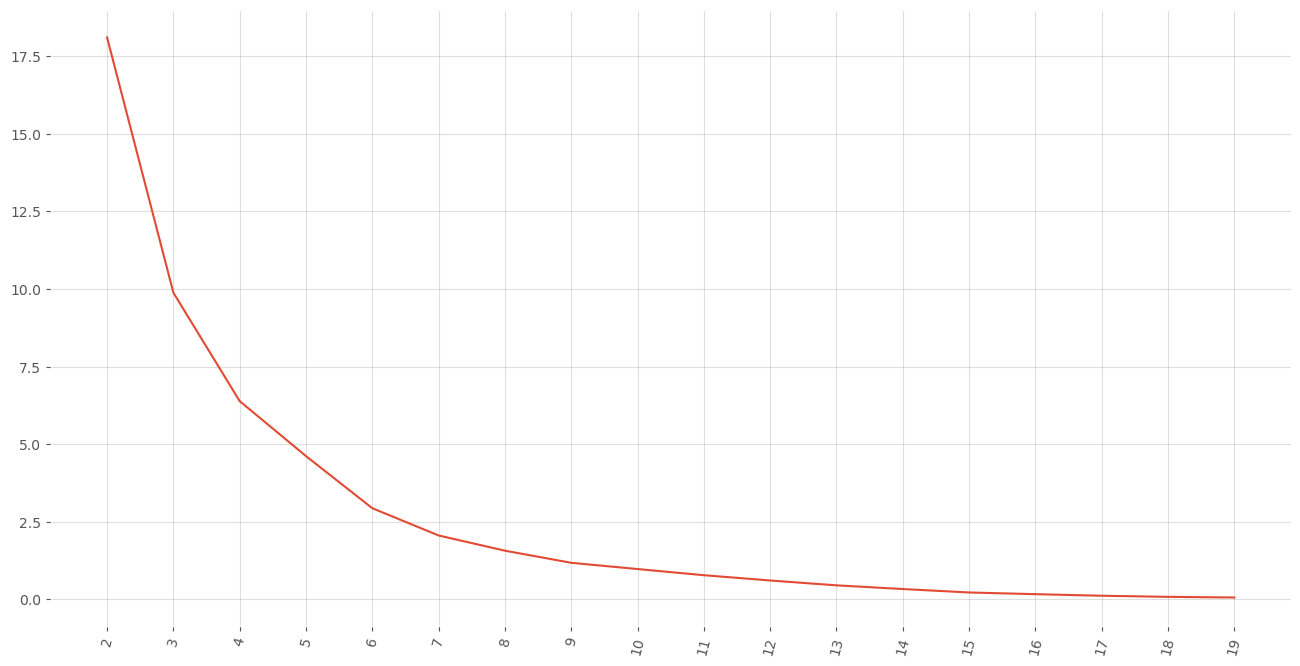

In [24]:
distorsions = []

max_loop = 20

for k in range(2, max_loop):
    kmeans = KMeans(n_clusters = k, random_state = 111)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(16, 8))

plt.plot(range(2, max_loop), distorsions)

plt.xticks([i for i in range(2, max_loop)], 
           rotation=75)

plt.grid(True)

> Inspecting the sum of squared errors chart, it appears that the elbow `kink` occurs in five or six clusters for this data. 

> Certainly, we can see that as the number of clusters increases beyond six, the sum of the square of errors within clusters reaches a plateau.

### <font color = red> Answer 1.2 is presented in the cell below: </font>

In [27]:
wss = distorsions 

In [28]:
percentage_reduction = [0] * 2  # There is no reduction for the first two points

for i in range(2, len(wss)):
    reduction = (wss[i-2] - wss[i]) / wss[i-2] * 100
    percentage_reduction.append(reduction)

In [50]:
def stop(percentage_reduction):
    i = 1
    for reduction_rate in percentage_reduction:
        i = i + 1
        if((reduction_rate < 45) & (i > 3)):
            return i

In [51]:
stop(percentage_reduction)

9

### <font color = red> Answer 1.3 is presented in the cell below: </font>

In [54]:
nclust = 9
k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(X)

KMeans(n_clusters=9)

In [55]:
target_labels = k_means.predict(X)

In [56]:
target_labels

array([3, 8, 3, 8, 3, 8, 4, 2, 1, 0, 1, 5, 5, 5, 1, 5, 7, 3, 3, 8, 3, 6,
       0, 7, 3, 6])

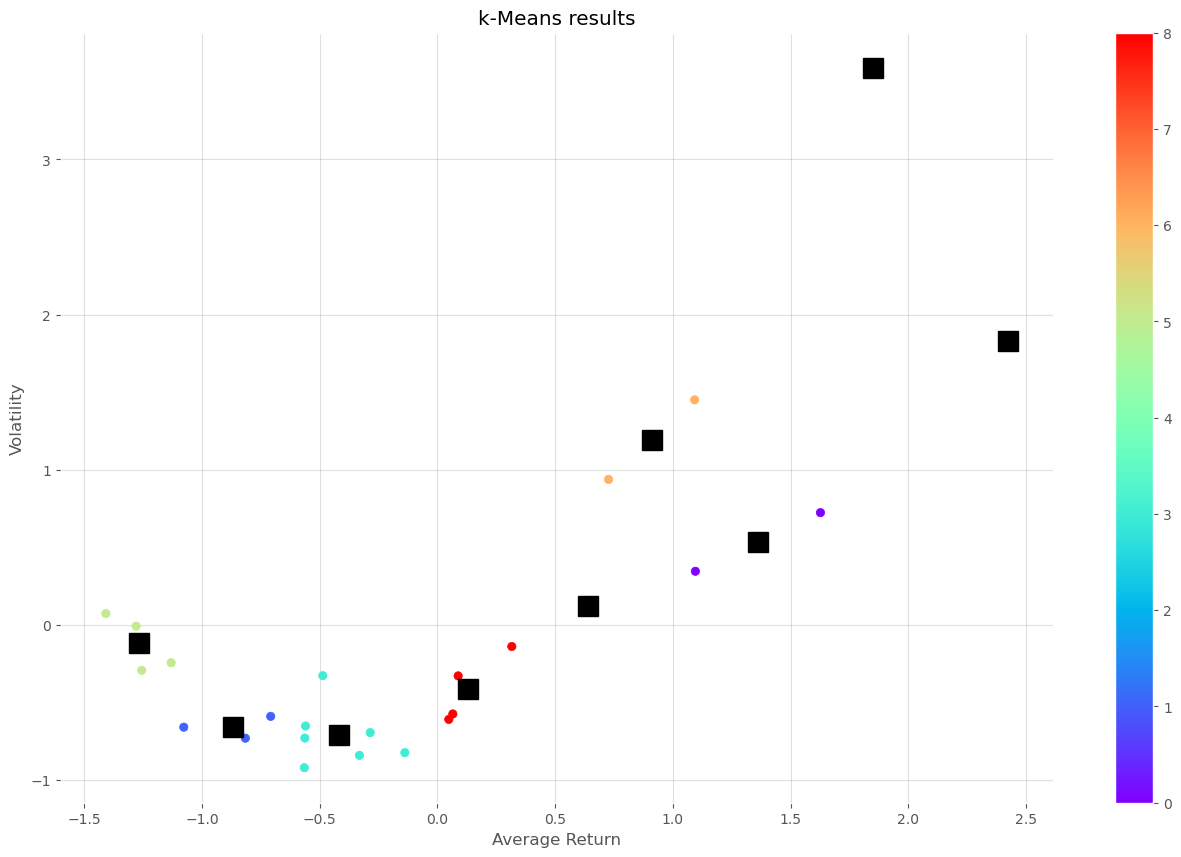

In [57]:
centroids = k_means.cluster_centers_

fig = plt.figure(figsize=(16,10)
                )

ax = fig.add_subplot(111)

scatter = ax.scatter(X.iloc[:,0], X.iloc[:,1], c = k_means.labels_, cmap = "rainbow", label = X.index)

ax.set_title("k-Means results")
ax.set_xlabel("Average Return")
ax.set_ylabel("Volatility")

plt.colorbar(scatter)

plt.plot(centroids[:,0], centroids[:,1], 'sg', markersize=15, color = "black")

###  <font color = blue> 👉 Questions 2 </font>. 

### Using the dataset provided, conduct a hierarchical clustering analysis using the AGNES (Agglomerative Nesting) algorithm. For this task, you will exclusively use the daily returns as your input feature for the clustering process.

### Proceed as follows:

> Use `Ward's` method to determine the linkage for the hierarchical clustering analysis.

> (1) Identify the pair of portfolio performances that are the most closely related (i.e., have the smallest distance).

> (2) Identify the pair of portfolio performances that are the least closely related (i.e., have the largest distance).

> (3) Generate and interpret a dendrogram that visualizes the clustering process and the relationships between the different portfolios.

### Below are the lines of code that lead to an answer:

In [63]:
X1 = X[["Returns"]]

### <font color = red> Answer 2.1 is presented in the cell below: </font>

In [65]:
from scipy.cluster.hierarchy import dendrogram, linkage, ward, fcluster
#Calulate linkage
Z = linkage(X1, method = "ward")

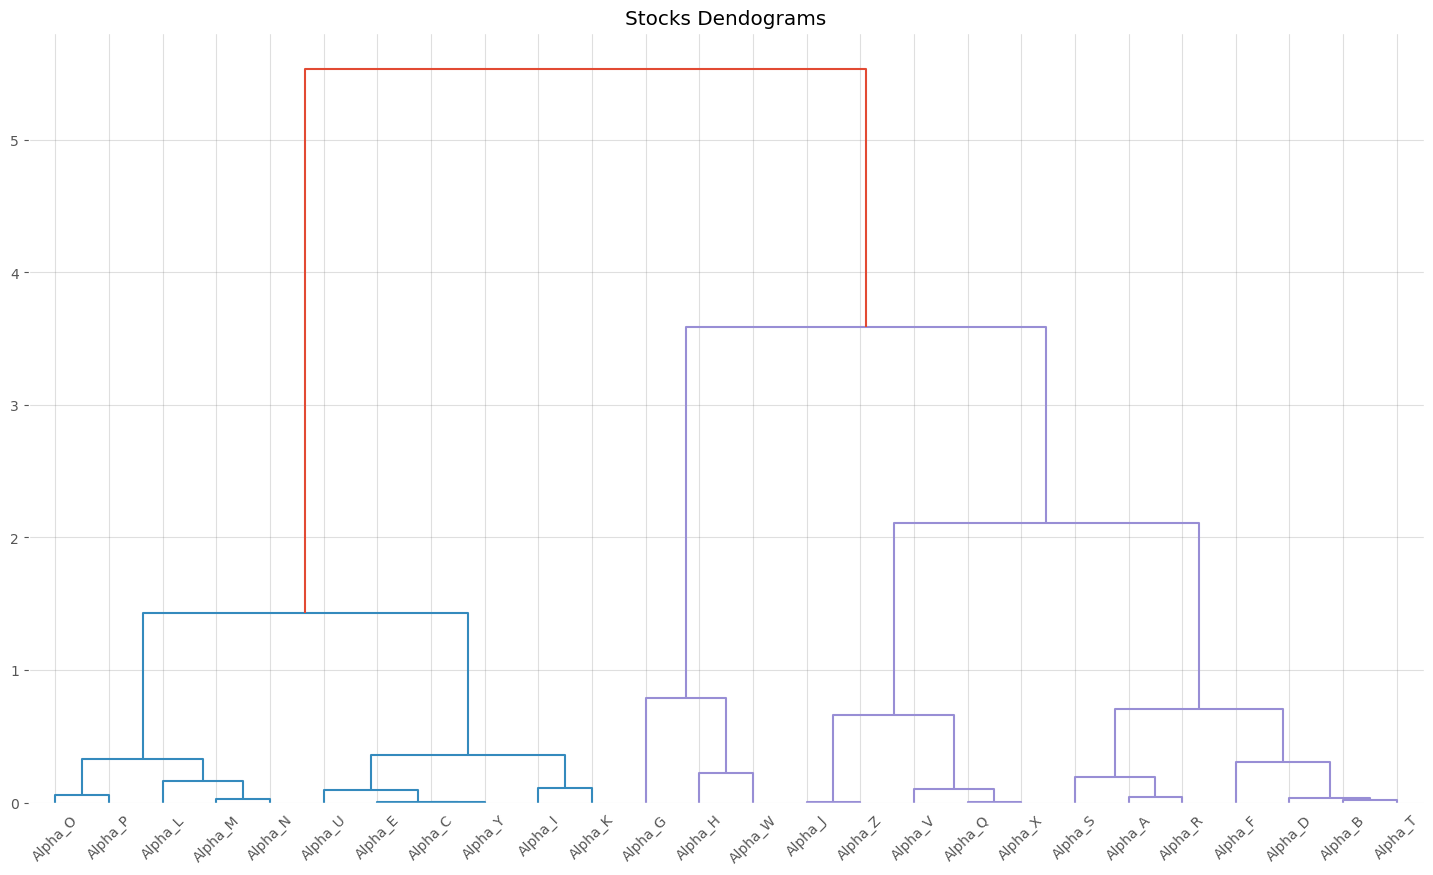

In [66]:
# Plot Dendogram

plt.figure(figsize=(18, 10)
          )
plt.title("Stocks Dendograms")

dendrogram(Z, labels = X.index)

plt.show()

In [72]:
distance_threshold = 0.002

clusters = fcluster(Z, distance_threshold, criterion='distance')

chosen_clusters = pd.DataFrame(data=clusters, 
                               columns=['cluster']
                              )

chosen_clusters['cluster'].value_counts().head(2)

cluster
17    2
19    1
Name: count, dtype: int64

In [74]:
X1.iloc[chosen_clusters[chosen_clusters['cluster']==17].index]

,Returns
Alpha_Q,0.641
Alpha_X,0.639


> (1) Q and X

### <font color = red> Answer 2.2 is presented in the cell below: </font>

In [75]:
distance_threshold = 5

clusters = fcluster(Z, distance_threshold, criterion='distance')

chosen_clusters = pd.DataFrame(data=clusters, 
                               columns=['cluster']
                              )

chosen_clusters['cluster'].value_counts().head(2)

cluster
2    15
1    11
Name: count, dtype: int64

In [76]:
X1.iloc[chosen_clusters[chosen_clusters['cluster']==1].index].head()

,Returns
Alpha_C,-0.563
Alpha_E,-0.560
Alpha_I,-0.708
Alpha_K,-0.816
Alpha_L,-1.409


In [77]:
X1.iloc[chosen_clusters[chosen_clusters['cluster']==2].index].head()

,Returns
Alpha_A,-0.286
Alpha_B,0.048
Alpha_D,0.088
Alpha_F,0.316
Alpha_G,2.422


> (2) Identify the pair of portfolio performances that are the least closely related (i.e., have the largest distance).

>randomly pick one from cluster1 and pick another from cluster2, they have the largest distance

### <font color = red> Answer 2.3 is presented in the cell below: </font>

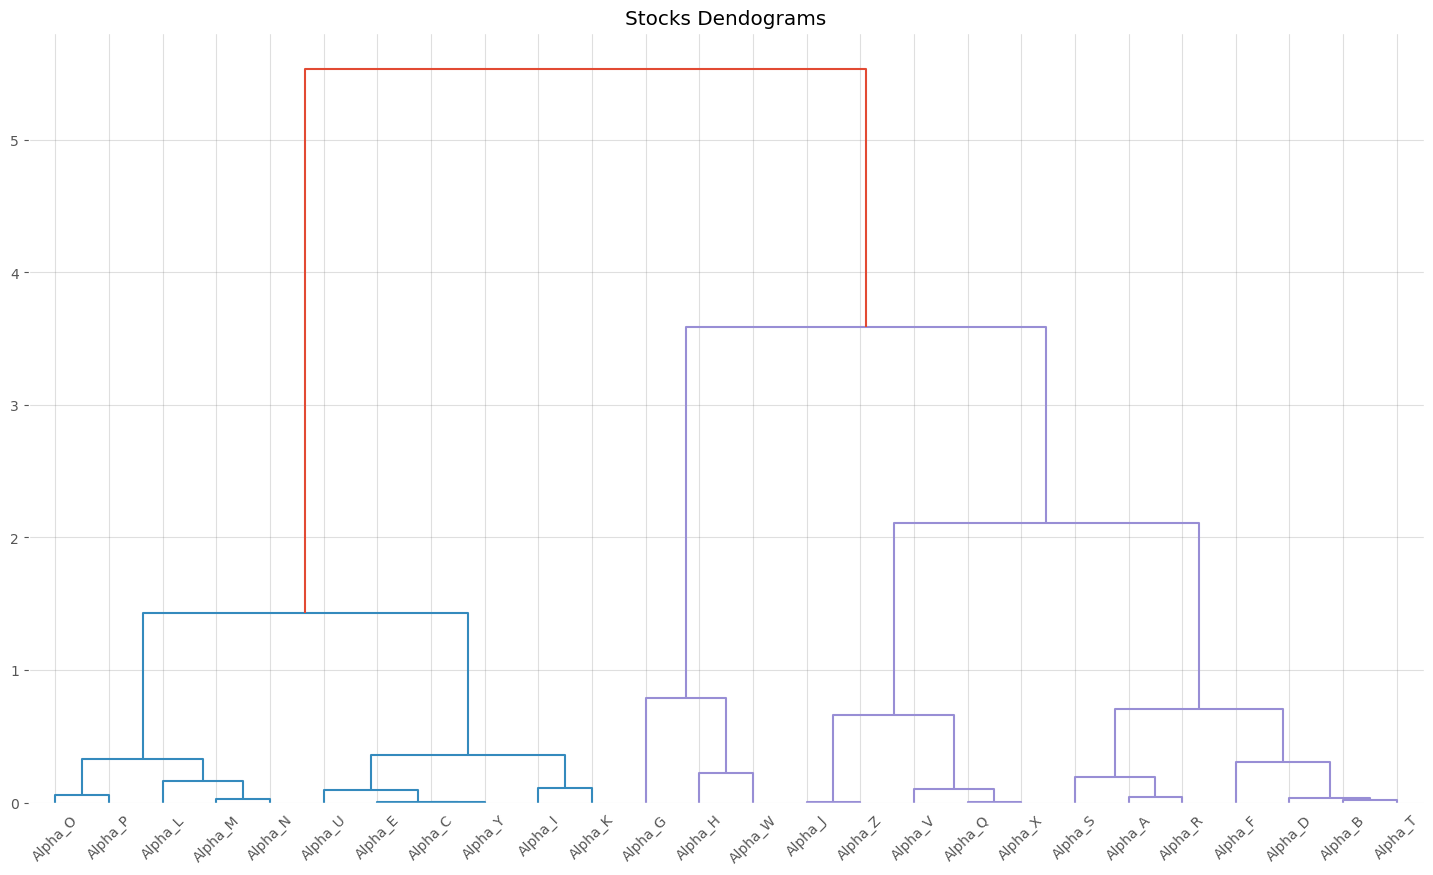

In [78]:
# Plot Dendogram

plt.figure(figsize=(18, 10)
          )
plt.title("Stocks Dendograms")

dendrogram(Z, labels = X.index)

plt.show()

## 👇 Questions 3 to 6 require you to construct, execute, and backtest theory-driven algorithmic trading strategies.

###  <font color = blue> 👉 Question 3. </font> Please use the datasets `qs3456_A.csv`, `qs3456_B.csv`, `qs3456_C.csv`. The time period for analysis is from October 2006 to December 2012.

### The strategy that you'll be developing is as follows: you create two separate Simple Moving Averages (SMA) of a time series with differing lookback periods (here, 40 days and 100 days). If the short moving average exceeds the long moving average then you go long, if the long moving average exceeds the short moving average then you exit.

```python
    df["Signal"] = 0
    df.loc[df["SMA_40"] > df["SMA_100"], "Signal"] = 1
    df.loc[df["SMA_40"] < df["SMA_100"], "Signal"] = 0
```

### On the days that the signal is 1 and the short moving average crosses the long moving average (for the period greater than the shortest moving average window), you'll buy a 100 shares. The days on which the signal is 0, the final result will be 0 as a result of the operation 100 x signal.

### For rolling statistics, set `min_periods` at `1` and `center` argument at `False`.

### Use `Adj Close` price.

### Let’s suppose that you started from a `$100,000` capital base for each of the three securities.

### Disregarding commission, how much will you have in the end in your account for each of the securities as a result of the current momentum-based trading?

### Below are the lines of code that lead to an answer:

In [90]:
A = pd.read_csv("qs3456_A.csv", index_col=0)

BUY_or_SELL = A.copy()
short_SMA = 40
long_SMA = 100

BUY_or_SELL["Long_SMA"] = BUY_or_SELL["Adj Close"].rolling(long_SMA).mean()
BUY_or_SELL["Short_SMA"] = BUY_or_SELL["Adj Close"].rolling(short_SMA).mean()

BUY_or_SELL["BUY_or_SELL"] = np.where(BUY_or_SELL["Short_SMA"] > BUY_or_SELL["Long_SMA"], 1, 0)


Capital = 1e5

Position =\
    (
    pd
    .DataFrame(index = BUY_or_SELL.index)
    .fillna(0.0)
    )

Position["A"] =\
    (100 * BUY_or_SELL["BUY_or_SELL"]
    )

Portfolio =\
(    Position
    .multiply(A["Adj Close"],
              axis = 0)
)

difference_in_shares_owned =\
(
    Position
    .diff()
)

Portfolio["our_holdings"] =\
    (
    Position
    .multiply(A["Adj Close"],
              axis = 0)
    ).sum(axis = 1)

Portfolio["our_cash"] =\
(    Capital - (difference_in_shares_owned
               .multiply(A["Adj Close"], axis = 0)
               ).sum(axis = 1)
                .cumsum()
)

Portfolio["total"] =\
    Portfolio["our_cash"] + Portfolio["our_holdings"]

Portfolio

,A,our_holdings,our_cash,total
Date,,,,
2006-10-02,0.000,0.000,100000.000,100000.000
2006-10-03,0.000,0.000,100000.000,100000.000
2006-10-04,0.000,0.000,100000.000,100000.000
2006-10-05,0.000,0.000,100000.000,100000.000
2006-10-06,0.000,0.000,100000.000,100000.000
...,...,...,...,...
2012-12-21,0.000,0.000,100910.540,100910.540
2012-12-24,0.000,0.000,100910.540,100910.540
2012-12-26,0.000,0.000,100910.540,100910.540


In [91]:
A = pd.read_csv("qs3456_B.csv", index_col=0)

BUY_or_SELL = A.copy()
short_SMA = 40
long_SMA = 100

BUY_or_SELL["Long_SMA"] = BUY_or_SELL["Adj Close"].rolling(long_SMA).mean()
BUY_or_SELL["Short_SMA"] = BUY_or_SELL["Adj Close"].rolling(short_SMA).mean()

BUY_or_SELL["BUY_or_SELL"] = np.where(BUY_or_SELL["Short_SMA"] > BUY_or_SELL["Long_SMA"], 1, 0)


Capital = 1e5

Position =\
    (
    pd
    .DataFrame(index = BUY_or_SELL.index)
    .fillna(0.0)
    )

Position["A"] =\
    (100 * BUY_or_SELL["BUY_or_SELL"]
    )

Portfolio =\
(    Position
    .multiply(A["Adj Close"],
              axis = 0)
)

difference_in_shares_owned =\
(
    Position
    .diff()
)

Portfolio["our_holdings"] =\
    (
    Position
    .multiply(A["Adj Close"],
              axis = 0)
    ).sum(axis = 1)

Portfolio["our_cash"] =\
(    Capital - (difference_in_shares_owned
               .multiply(A["Adj Close"], axis = 0)
               ).sum(axis = 1)
                .cumsum()
)

Portfolio["total"] =\
    Portfolio["our_cash"] + Portfolio["our_holdings"]

Portfolio

,A,our_holdings,our_cash,total
Date,,,,
2006-10-02,0.000,0.000,100000.000,100000.000
2006-10-03,0.000,0.000,100000.000,100000.000
2006-10-04,0.000,0.000,100000.000,100000.000
2006-10-05,0.000,0.000,100000.000,100000.000
2006-10-06,0.000,0.000,100000.000,100000.000
...,...,...,...,...
2012-12-21,0.000,0.000,100377.828,100377.828
2012-12-24,0.000,0.000,100377.828,100377.828
2012-12-26,0.000,0.000,100377.828,100377.828


In [92]:
A = pd.read_csv("qs3456_C.csv", index_col=0)

BUY_or_SELL = A.copy()
short_SMA = 40
long_SMA = 100

BUY_or_SELL["Long_SMA"] = BUY_or_SELL["Adj Close"].rolling(long_SMA).mean()
BUY_or_SELL["Short_SMA"] = BUY_or_SELL["Adj Close"].rolling(short_SMA).mean()

BUY_or_SELL["BUY_or_SELL"] = np.where(BUY_or_SELL["Short_SMA"] > BUY_or_SELL["Long_SMA"], 1, 0)


Capital = 1e5

Position =\
    (
    pd
    .DataFrame(index = BUY_or_SELL.index)
    .fillna(0.0)
    )

Position["A"] =\
    (100 * BUY_or_SELL["BUY_or_SELL"]
    )

Portfolio =\
(    Position
    .multiply(A["Adj Close"],
              axis = 0)
)

difference_in_shares_owned =\
(
    Position
    .diff()
)

Portfolio["our_holdings"] =\
    (
    Position
    .multiply(A["Adj Close"],
              axis = 0)
    ).sum(axis = 1)

Portfolio["our_cash"] =\
(    Capital - (difference_in_shares_owned
               .multiply(A["Adj Close"], axis = 0)
               ).sum(axis = 1)
                .cumsum()
)

Portfolio["total"] =\
    Portfolio["our_cash"] + Portfolio["our_holdings"]

Portfolio

,A,our_holdings,our_cash,total
Date,,,,
2006-10-02,0.000,0.000,100000.000,100000.000
2006-10-03,0.000,0.000,100000.000,100000.000
2006-10-04,0.000,0.000,100000.000,100000.000
2006-10-05,0.000,0.000,100000.000,100000.000
2006-10-06,0.000,0.000,100000.000,100000.000
...,...,...,...,...
2012-12-21,0.000,0.000,99331.180,99331.180
2012-12-24,0.000,0.000,99331.180,99331.180
2012-12-26,0.000,0.000,99331.180,99331.180


### <font color = red> Answer 3 </font>


    A  : _$_____100910.54_________ 
    
    B  : _$____100377.828__________ 
    
    C  : _$____99331.18__________ 


###  <font color = blue> 👉 Question 4. </font>  

### Calculate and visualize the maximum drawdowns and the longest drawdown periods for `A`, `B`, and `C`.

### Below are the lines of code that lead to an answer:

In [118]:
A = pd.read_csv("qs3456_A.csv", index_col=0)

In [124]:
A.index = pd.to_datetime(A.index)

In [125]:
A["Log_return"] = np.log(A["Adj Close"]/A["Adj Close"].shift(1))
A["Long_SMA"] = A["Adj Close"].rolling(long_SMA).mean()
A["Short_SMA"] = A["Adj Close"].rolling(short_SMA).mean()

A["Position"] = np.where(A["Short_SMA"] > A["Long_SMA"], 1, 0)
A["Log_strategy"] = A["Log_return"]*A["Position"]
A["Buy_or_Sell"] = A["Position"].diff()

#Calculate the maximum drawdowns  
A["Cumulative_return"] = A["Log_strategy"].cumsum().apply(np.exp)
A["Max_performance"] = A["Cumulative_return"].cummax()
A["Drawdown"] = -(A["Cumulative_return"] - A["Max_performance"])/A["Max_performance"]
max_drawdown = A["Drawdown"].max()
print(f"Max drawdon is {max_drawdown}")

#longest drawdown period
periods = (
A[A["Drawdown"]==0]["Drawdown"].index[1:].to_pydatetime()
-
A[A["Drawdown"]==0]["Drawdown"].index[:-1].to_pydatetime()
)

print(f"The longest drawdown period is {periods.max().days} days")

Max drawdon is 0.4630351509110635
The longest drawdown period is 620 days


In [126]:
B = pd.read_csv("qs3456_B.csv", index_col=0)
B.index = pd.to_datetime(B.index)

In [127]:
B["Log_return"] = np.log(B["Adj Close"]/B["Adj Close"].shift(1))
B["Long_SMA"] = B["Adj Close"].rolling(long_SMA).mean()
B["Short_SMA"] = B["Adj Close"].rolling(short_SMA).mean()

B["Position"] = np.where(B["Short_SMA"] > B["Long_SMA"], 1, 0)
B["Log_strategy"] = B["Log_return"]*B["Position"]
B["Buy_or_Sell"] = B["Position"].diff()

#Calculate the maximum drawdowns  
B["Cumulative_return"] = B["Log_strategy"].cumsum().apply(np.exp)
B["Max_performance"] = B["Cumulative_return"].cummax()
B["Drawdown"] = -(B["Cumulative_return"] - B["Max_performance"])/B["Max_performance"]
max_drawdown = B["Drawdown"].max()
print(f"Max drawdon is {max_drawdown}")



#longest drawdown period
periods = (
B[B["Drawdown"]==0]["Drawdown"].index[1:].to_pydatetime()
-
B[B["Drawdown"]==0]["Drawdown"].index[:-1].to_pydatetime()
)

print(f"The longest drawdown period is {periods.max().days} days")

Max drawdon is 0.49394575870026697
The longest drawdown period is 741 days


In [128]:
C = pd.read_csv("qs3456_C.csv", index_col=0)
C.index = pd.to_datetime(C.index)

In [129]:
C["Log_return"] = np.log(C["Adj Close"]/C["Adj Close"].shift(1))
C["Long_SMA"] = C["Adj Close"].rolling(long_SMA).mean()
C["Short_SMA"] = C["Adj Close"].rolling(short_SMA).mean()

C["Position"] = np.where(C["Short_SMA"] > C["Long_SMA"], 1, 0)
C["Log_strategy"] = C["Log_return"]*C["Position"]
C["Buy_or_Sell"] = C["Position"].diff()

#Calculate the maximum drawdowns  
C["Cumulative_return"] = C["Log_strategy"].cumsum().apply(np.exp)
C["Max_performance"] = C["Cumulative_return"].cummax()
C["Drawdown"] = -(C["Cumulative_return"] - C["Max_performance"])/C["Max_performance"]
max_drawdown = C["Drawdown"].max()
print(f"Max drawdon is {max_drawdown}")


#longest drawdown period
periods = (
C[C["Drawdown"]==0]["Drawdown"].index[1:].to_pydatetime()
-
C[C["Drawdown"]==0]["Drawdown"].index[:-1].to_pydatetime()
)

print(f"The longest drawdown period is {periods.max().days} days")

Max drawdon is 0.3353423963395399
The longest drawdown period is 878 days


### <font color = red> Answer 4 (`visualization component`) is presented in the cell below: </font>

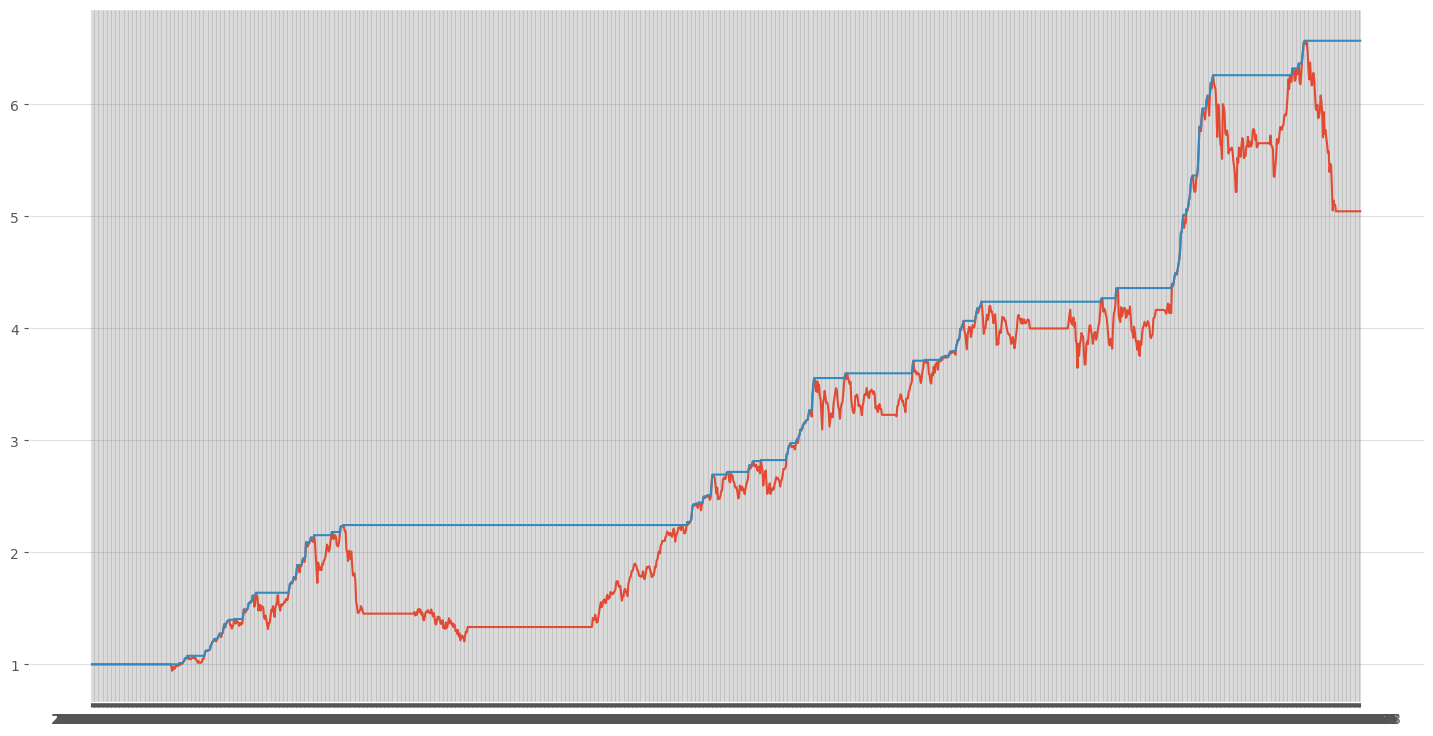

In [121]:
#visualize
plt.figure(figsize=(18,9))
plt.plot(A[["Cumulative_return", "Max_performance"]])
plt.show()

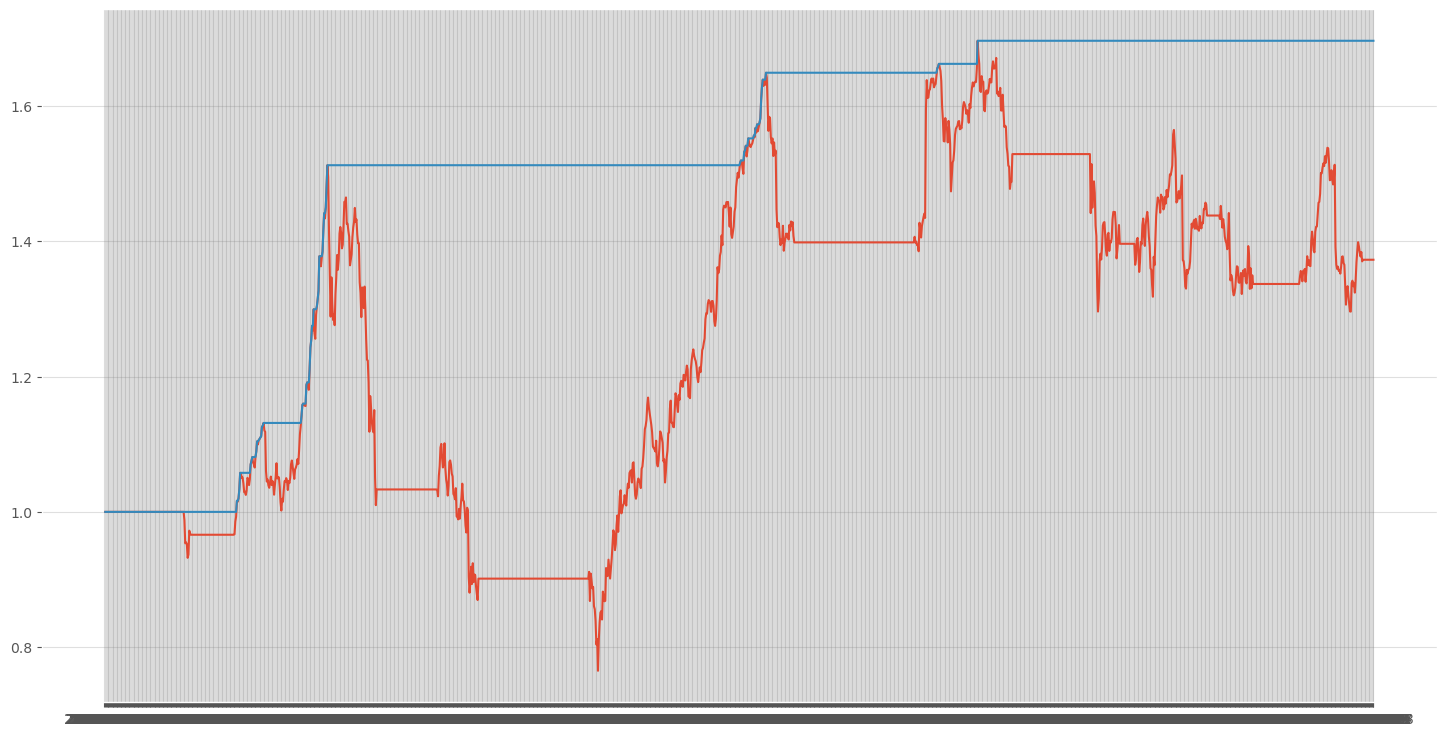

In [122]:
#visualize
plt.figure(figsize=(18,9))
plt.plot(B[["Cumulative_return", "Max_performance"]])
plt.show()

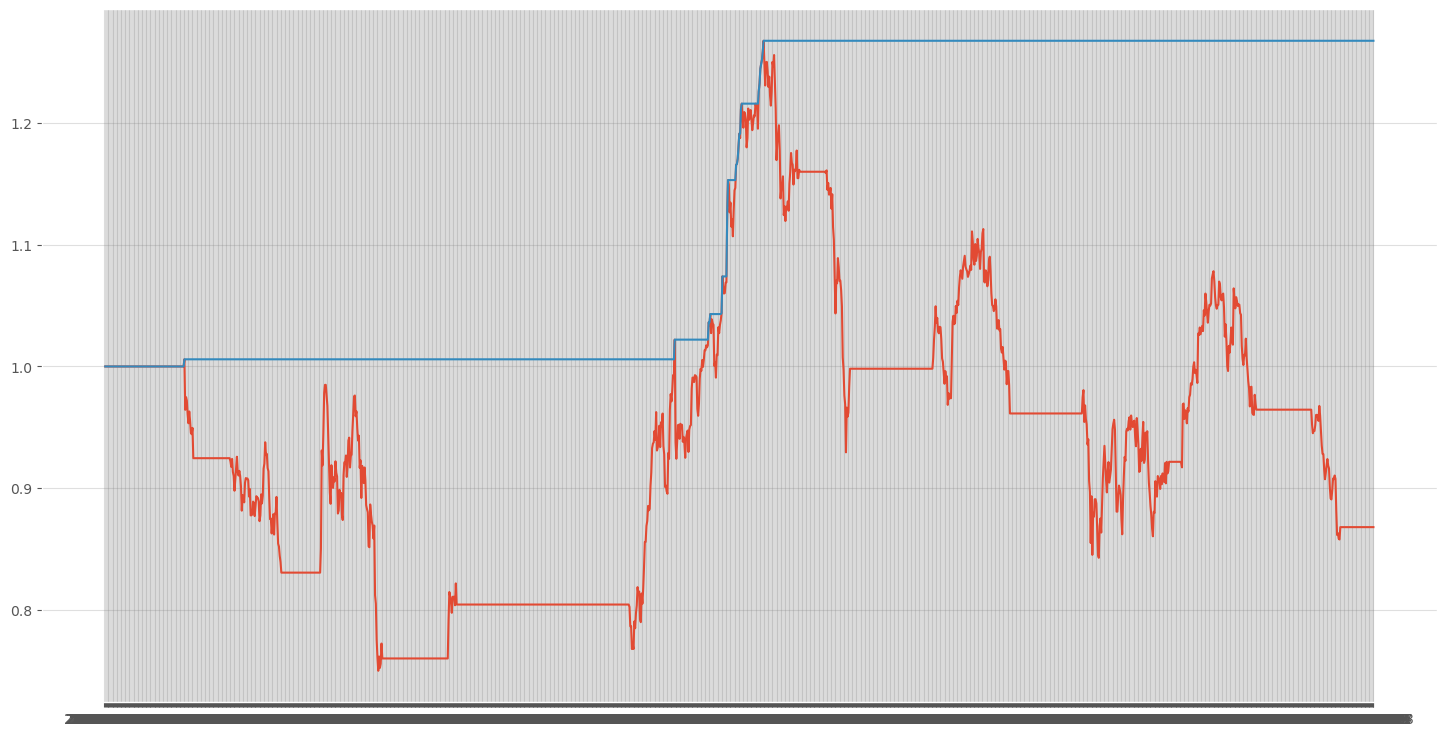

In [123]:
#visualize
plt.figure(figsize=(18,9))
plt.plot(C[["Cumulative_return", "Max_performance"]])
plt.show()

### <font color = red> Answer 4 </font>
    
    As to A,
    
    The maximum drawdown is about ___46.30_________ percentage points.
    The longest drawdown period lasts for _____620________ days.
    
    As to B,
    
    The maximum drawdown is about ___49.39_________ percentage points.
    The longest drawdown period lasts for ___741__________ days.
    
    As to C,
    
    The maximum drawdown is about ___33.53_________ percentage points.
    The longest drawdown period lasts for _____878________ days.


###  <font color = blue> 👉 Question 5. </font> Using the current momentum strategy, which of the securities shows the greatest Sharpe ratio?

### Below are the lines of code that lead to an answer:

In [131]:
A["Log_strategy"].fillna(0, inplace=True)

(
    253**0.5
    *
    np.mean(A["Log_strategy"].apply(np.exp)-1)
    /
    np.std(A["Log_strategy"].apply(np.exp)-1)
)

1.0998176272582065

In [132]:
B["Log_strategy"].fillna(0, inplace=True)

(
    253**0.5
    *
    np.mean(B["Log_strategy"].apply(np.exp)-1)
    /
    np.std(B["Log_strategy"].apply(np.exp)-1)
)

0.35145969103517455

In [133]:
C["Log_strategy"].fillna(0, inplace=True)

(
    253**0.5
    *
    np.mean(C["Log_strategy"].apply(np.exp)-1)
    /
    np.std(C["Log_strategy"].apply(np.exp)-1)
)

-0.049244646279705324

### <font color = red> Answer 5 </font>

    The answer is __________A__________________ .

###  <font color = blue> 👉 Question 6. </font> Report compound annual growth rate (CAGR) for `A`, `B`, and `C`.

### Below are the lines of code that lead to an answer:

In [134]:
import math

In [137]:
days = (A.index[-1] - A.index[0]).days

In [138]:
CAGR_A =\
(
    math
    .exp(A["Log_strategy"].sum())
    **
    (365/days)
    -
    1
)
CAGR_A

0.29589095237947194

In [139]:
CAGR_B =\
(
    math
    .exp(B["Log_strategy"].sum())
    **
    (365/days)
    -
    1
)
CAGR_B

0.0520206000838479

In [140]:
CAGR_C =\
(
    math
    .exp(C["Log_strategy"].sum())
    **
    (365/days)
    -
    1
)
CAGR_C

-0.022440739990969405

### <font color = red> Answer 6 </font>


    AAPL  : ____29.59_________%__ 
    
    GOOGL : _____5.20________%__ 
    
    MSFT  : ____-2.24_________%__ 


## 👇 Questions 7 to 9 ask you to create a predictive model for the weekly return of IBM stock. You will use supervised learning for your predictive modelling.

### <font color = "green"> NOTE: There are 10 questions in the assessment, and each question has three credits. Questions 7–9 thus have a total of nine credits allocated, but with only two actual questions. 
    
### <font color = "green"> Question 7 is about building a predictive model. For correctly completing all parts of it, you will receive three credits. 
    
### <font color = "green"> In Questions 8 and 9 you are competing with our classmates with the performance of your predictive models. 
    
### <font color = "green"> Predictive models are ultimately assessed based on their performance in prediction. Questions 4 and 5 are for `relative grading`, based on your predictive model’s performance. That is, your answer here will be assessed relative to other students’ performances.

You must give your best algorithm (`best`, based on performance metrics). 

* if your best model’s performance is among the `top five` results in class, you will receive `six points`; 
* if your best model’s performance is `between the 6th and 10th ranks`, you will receive `three points`; 
* `the rest of our classmates` will receive `two points`.

* `MSE` will be the first criterion for performance appraisal. In the event of a tie, `R-squared` will be used as a tie-breaker.

> Among the three major factors (correlated assets, technical indicators, and fundamental analysis), you will use correlated assets and technical indicators as input features here.

    Step 0. The analysis horizon is 10 years between 2010 and 2019.
    
    Step 1. Use 80% of your data for the training of your algorithm, and 20% for the testing set.

    Step 2. For your feature engineering...
    
> Our operational definition of `outcome` (`Y`) is the weekly return of IBM. The number of trading days in a week is assumed to be five, and we compute the return using five trading days. 
<br>
    
### <font color = "green"> NOTE: The lagged five-day variables embed the time series component by using a time-delay approach, where the lagged variable is included as one of the predictor variables. This step translates the time series data into a supervised regression-based model framework. For `handling missing values`, please apply `listwise deletion`. This means that if any column has a missing value for a particular row, that entire row will be excluded from all columns.
    
### <font color = "green"> For `input features` (`predictors`; `Xs`), you may `choose` to use any or all of the following features.

> `Correlated assets`

* lagged five-day returns of stocks (AAPL, AMZN, MSFT);
* currency exchange rates (USD/JPY and GBP/USD);
* indices (S&P 500, Dow Jones, and VIX);
* lagged five-day, 15-day, 30-day, and 60-day returns of IBM.

> `Technical indicators`

* 21-day, 63-day, and 252-day moving averages;
* 10-day, 30-day, and 200-day exponential moving averages;
* 10-day, 30-day, and 200-day relative strength index
    
    Step 3. For your algorithm of choices, please assess the model performance of the following algorithms: 

* Linear Regression
* Elastic Net
* LASSO
* Support Vector Machine
* K-Nearest Neighbor
* ARIMA
* Decision Tree
* Extra Trees 
* Random Forest
* Gradient Boosting Tree
* Adaptive Boosting
    
    
    Step 4. For this question, hyperparameter tuning won’t be requested. 
    
    Step 5. But make sure to compare the model performance of the above algorithms.

### Set `num_folds` at `10`, `seed` at `111` 
    
### The metric for assessing model performance will be mean squared error (`MSE`) and r-squared ($ R^2 $).

```python
# how to import r2_score
from sklearn.metrics import r2_score

```

### Below are the lines of code that lead to an <font color = red> Answer 7 </font>:

In [141]:
from sklearn.metrics import r2_score

In [144]:
data = pd.read_csv("qs789.csv", index_col=0)

In [148]:
data.dropna(inplace = True)

In [150]:
stock_data = data[["AAPL", "AMZN", "IBM","MSFT"]]
currency_data = data[["GBPUSD=X", "JPY=X"]]
index_data = data[["^DJI", "^GSPC", "^VIX"]]

In [151]:
return_period = 5

In [153]:
stock_data

,AAPL,AMZN,IBM,MSFT
4/1/10,6.488,6.695,78.346,23.523
5/1/10,6.499,6.734,77.399,23.530
6/1/10,6.395,6.613,76.897,23.386
7/1/10,6.384,6.500,76.630,23.143
8/1/10,6.426,6.676,77.399,23.302
...,...,...,...,...
23/12/19,69.262,89.650,107.616,151.994
24/12/19,69.327,89.461,107.163,151.965
26/12/19,70.703,93.438,107.108,153.211
27/12/19,70.676,93.490,107.393,153.491


In [157]:
Y =\
    (np
     .log(stock_data.loc[ : , "IBM"]
         )
     .diff(return_period)
    )

Y

4/1/10        NaN
5/1/10        NaN
6/1/10        NaN
7/1/10        NaN
8/1/10        NaN
            ...  
23/12/19    0.011
24/12/19    0.006
26/12/19    0.004
27/12/19    0.005
30/12/19   -0.021
Name: IBM, Length: 2510, dtype: float64

In [158]:
Y.name = Y.name[-1]+"_pred"
Y

4/1/10        NaN
5/1/10        NaN
6/1/10        NaN
7/1/10        NaN
8/1/10        NaN
            ...  
23/12/19    0.011
24/12/19    0.006
26/12/19    0.004
27/12/19    0.005
30/12/19   -0.021
Name: M_pred, Length: 2510, dtype: float64

In [159]:
stock_data.columns

Index(['AAPL', 'AMZN', 'IBM', 'MSFT'], dtype='object')

In [161]:
X1 =\
    (np.
     log(stock_data.loc[ : , stock_data.columns]
        )
     .diff(return_period)
     .shift(return_period)
    )

X1

,AAPL,AMZN,IBM,MSFT
4/1/10,NaN,NaN,NaN,NaN
5/1/10,NaN,NaN,NaN,NaN
6/1/10,NaN,NaN,NaN,NaN
7/1/10,NaN,NaN,NaN,NaN
8/1/10,NaN,NaN,NaN,NaN
...,...,...,...,...
23/12/19,0.047,0.011,0.002,0.027
24/12/19,0.043,0.029,0.002,0.023
26/12/19,0.033,0.020,0.005,0.017
27/12/19,0.031,0.018,-0.006,0.016


In [162]:
X2 =\
    (np
     .log(currency_data)
     .diff(return_period)
    )

X2

,GBPUSD=X,JPY=X
4/1/10,NaN,NaN
5/1/10,NaN,NaN
6/1/10,NaN,NaN
7/1/10,NaN,NaN
8/1/10,NaN,NaN
...,...,...
23/12/19,-0.026,0.001
24/12/19,-0.025,-0.002
26/12/19,-0.011,-0.001
27/12/19,-0.007,-0.000


In [163]:
X3 =\
    (np
     .log(index_data)
     .diff(return_period)
    )

X3

,^DJI,^GSPC,^VIX
4/1/10,NaN,NaN,NaN
5/1/10,NaN,NaN,NaN
6/1/10,NaN,NaN,NaN
7/1/10,NaN,NaN,NaN
8/1/10,NaN,NaN,NaN
...,...,...,...
23/12/19,0.011,0.010,0.038
24/12/19,0.009,0.010,0.030
26/12/19,0.013,0.015,0.006
27/12/19,0.009,0.011,0.072


In [164]:
X4 =\
    (
    pd
    .concat([np
             .log(stock_data.loc[ : , "IBM"]
                 )
             .diff(i) for i in [return_period, 
                                return_period * 3, 
                                return_period * 6, 
                                return_period * 12]
            ],
           axis = 1
           )
    .shift(return_period)
    .dropna()
)

X4.columns = ["IBM_DT", "IBM_3DT", "IBM_6DT", "IBM_12DT"]

In [165]:
X5 = (
    pd.concat(
        [
            stock_data["IBM"]
            .rolling(i)
            .mean() 
            for i in [21
                      ,63
                      ,252
                     ]
        ],
        axis=1
    )
)

X5.columns = ["IBM_SMA21","IBM_SMA63","IBM_SMA252"]

In [166]:
X6 = (
    pd.concat(
        [
            stock_data["IBM"]
            .ewm(i).mean() 
            for i in [10,
                      30,
                      200]
        ],
        axis=1
    )
)

X6.columns = ["IBM_EMA10","IBM_EMA30","IBM_EMA200"]

In [169]:
X = pd.concat([X1, X2, X3, X4, X5, X6],axis=1)
X

,AAPL,AMZN,IBM,MSFT,GBPUSD=X,JPY=X,^DJI,^GSPC,^VIX,IBM_DT,IBM_3DT,IBM_6DT,IBM_12DT,IBM_SMA21,IBM_SMA63,IBM_SMA252,IBM_EMA10,IBM_EMA30,IBM_EMA200
4/1/10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.346,78.346,78.346
5/1/10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.850,77.865,77.871
6/1/10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.502,77.532,77.545
7/1/10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.252,77.295,77.315
8/1/10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.287,77.317,77.332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23/12/19,0.047,0.011,0.002,0.027,-0.026,0.001,0.011,0.010,0.038,0.002,-0.002,0.001,-0.044,106.436,107.793,105.857,106.704,107.313,106.584
24/12/19,0.043,0.029,0.002,0.023,-0.025,-0.002,0.009,0.010,0.030,0.002,-0.013,-0.014,-0.045,106.460,107.711,105.948,106.745,107.308,106.587
26/12/19,0.033,0.020,0.005,0.017,-0.011,-0.001,0.013,0.015,0.006,0.005,-0.005,-0.014,-0.041,106.420,107.623,106.050,106.778,107.301,106.590
27/12/19,0.031,0.018,-0.006,0.016,-0.007,-0.000,0.009,0.011,0.072,-0.006,0.006,-0.019,-0.050,106.427,107.544,106.141,106.834,107.304,106.594


In [170]:
data =\
(
pd
.concat([Y, X],
        axis = 1)
.dropna()
.iloc[ : :return_period, :]
)

In [171]:
Y = data.loc[ : , Y.name]

Y

31/12/10    0.006
7/1/11      0.008
14/1/11     0.014
24/1/11     0.062
31/1/11     0.015
            ...  
25/11/19    0.012
3/12/19    -0.029
10/12/19    0.013
17/12/19    0.002
24/12/19    0.006
Name: M_pred, Length: 452, dtype: float64

In [172]:
X = data.loc[ : , X.columns]

X

,AAPL,AMZN,IBM,MSFT,GBPUSD=X,JPY=X,^DJI,^GSPC,^VIX,IBM_DT,IBM_3DT,IBM_6DT,IBM_12DT,IBM_SMA21,IBM_SMA63,IBM_SMA252,IBM_EMA10,IBM_EMA30,IBM_EMA200
31/12/10,0.007,0.025,0.009,0.011,0.002,-0.025,0.000,0.001,0.075,0.009,0.005,-0.005,0.078,87.586,86.213,78.812,87.604,85.767,80.231
7/1/11,-0.003,-0.014,0.006,-0.014,0.001,0.022,0.008,0.011,-0.035,0.006,0.017,0.033,0.067,87.994,86.724,79.044,88.168,86.267,80.532
14/1/11,0.041,0.030,0.008,0.024,0.025,-0.006,0.010,0.017,-0.103,0.008,0.023,0.014,0.057,88.537,87.141,79.286,88.723,86.769,80.837
24/1/11,0.036,0.017,0.014,-0.011,0.009,-0.002,0.016,-0.002,0.132,0.014,0.028,0.033,0.080,90.016,87.915,79.631,90.691,87.830,81.268
31/1/11,-0.032,-0.065,0.062,0.003,-0.010,-0.006,-0.007,-0.004,0.101,0.062,0.084,0.101,0.125,92.158,88.886,80.094,93.091,89.220,81.791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25/11/19,0.019,-0.011,-0.009,0.029,-0.005,0.000,0.001,0.004,-0.049,-0.009,-0.001,-0.039,0.048,107.041,108.965,104.698,107.194,108.076,106.607
3/12/19,-0.003,0.012,0.012,0.009,0.007,0.003,-0.020,-0.013,0.296,0.012,-0.001,-0.032,0.015,107.113,108.998,104.996,106.748,107.775,106.595
10/12/19,-0.026,-0.002,-0.029,-0.013,0.016,-0.004,0.014,0.013,-0.018,-0.029,-0.025,0.008,-0.065,106.363,108.500,105.244,106.340,107.448,106.570
17/12/19,0.034,-0.018,0.013,0.012,0.010,0.009,0.014,0.019,-0.244,0.013,-0.003,-0.004,-0.050,106.276,108.069,105.545,106.454,107.326,106.572


In [173]:
validation_size = 0.2

train_size =\
    int(len(X) 
        * 
        (1 - validation_size)
       )

X_train, X_test =\
    (X[0         :train_size], 
     X[train_size:len(X)    ]
    )

Y_train, Y_test =\
    (Y[0         :train_size], 
     Y[train_size:len(X)    ]
    )

In [174]:
#next we fill in the model mentioned in step 3
# Loading Algorithm

from sklearn.linear_model import LinearRegression

# Regularization
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# ENSEMBLE

## Bagging
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

## Boosting
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Support Vector Machine
from sklearn.svm import SVR

# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsRegressor

# Multi-layer Perceptron (Neural Networks)
from sklearn.neural_network import MLPRegressor

In [175]:
# for assessment
from sklearn.metrics import mean_squared_error

#for ingore warnings
import warnings
warnings.filterwarnings("ignore")

In [176]:
models = []
#Linear Regression
models.append(("LR", LinearRegression()
             )
            )

#Elastic Net
models.append(("EN", ElasticNet()
             )
            )

#LASSO
models.append(("LASSO", Lasso()
             )
            )

#Support Vector Machine
models.append(("SVR", SVR()
             )
            )

#K-Nearest Neighbor
models.append(("KNN", KNeighborsRegressor()
             )
            )

#ARIMA

#Decision Tree
models.append(("CART", DecisionTreeRegressor()
             )
            )

#Extra Trees
models.append(("ETR", ExtraTreesRegressor()
              )
             )

#Random Forest
models.append(("RFR", RandomForestRegressor()
              )
             )

#Gradient Boosting Tree
models.append(("GBR", GradientBoostingRegressor()
              )
             )

#Adaptive Boosting
models.append(("ABR", AdaBoostRegressor()
              )
             )

In [177]:
train_results = []
test_results = []

names = []

for name, model in models:
    
    names.append(name)
    
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    

In [178]:
#we're not done yet still have ARIMA left
import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm

modelARIMA =\
(    stats
     .ARIMA(endog = Y_train,
                exog = X_train,
                order = [1, 0, 0]
            )
)

model_fit = modelARIMA.fit()

E:\software\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\software\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\software\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\software\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\software\anaconda3\Lib\site-packages\statsm

In [179]:
train_mse = mean_squared_error(Y_train,model_fit.fittedvalues)

In [180]:
predicted =\
(
    model_fit
    .predict(start = train_size - 1,
             end = len(X) - 1,
             exog = X_test)[1: ]
)

E:\software\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [181]:
test_mse = mean_squared_error(Y_test,predicted)

In [182]:
names.append("ARIMA")
train_results.append(train_mse)
test_results.append(test_mse)

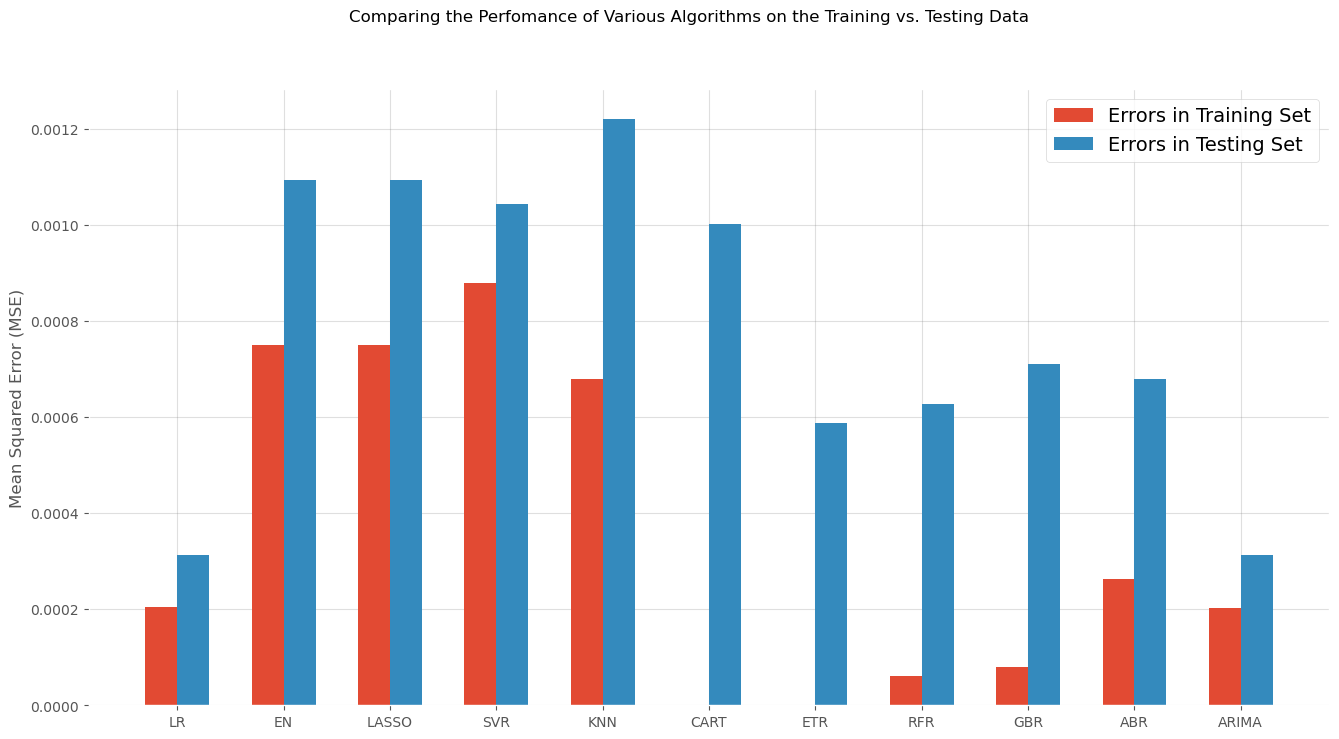

In [183]:
#finally we visualize it
fig = plt.figure(figsize = [16, 8])

ind = np.arange(len(names)
               )

width = 0.30

fig.suptitle("Comparing the Perfomance of Various Algorithms on the Training vs. Testing Data")

ax = fig.add_subplot(111)

(plt
 .bar(ind - width/2,
      train_results,
      width = width,
      label = "Errors in Training Set")
)

(plt
 .bar(ind + width/2,
      test_results,
      width = width,
      label = "Errors in Testing Set")
)

plt.legend()

ax.set_xticks(ind)
ax.set_xticklabels(names)

plt.ylabel("Mean Squared Error (MSE)")

plt.show()

### Below are the lines of code that lead to an <font color = red>Answer 8</font> and <font color = red>Answer 9</font> :

### <font color = green> NOTE: You must give your best algorithm here (`best`, based on performance metrics). 

In [184]:
Y = pd.DataFrame(Y_test)

In [187]:
res = models[0][1].fit(X_train, Y_train)
predicted = res.predict(X_test)
predicted = pd.DataFrame(predicted, index=Y_test.index)

col = models[0][0]
Y[col] = np.sign(predicted)

In [190]:
Y[f"M_pred_{col}"] = Y["M_pred"]*Y[col]

In [191]:
strategy = np.exp(Y["M_pred_LR"])-1
np.sqrt(252)*np.mean(strategy)/np.std(strategy)

13.027957793490927

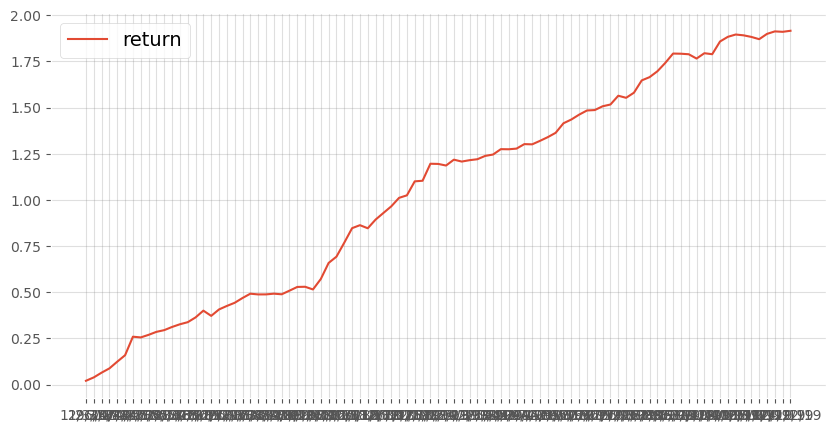

In [192]:
plt.figure(figsize=[10,5])
plt.plot(Y["M_pred_LR"].cumsum(), label = "return")


plt.legend()
plt.show()

### <font color = blue> 👉 Question 10</font>. This question is where you will execute principal component analysis (PCA) for portfolio management.
    
### In accordance with the concepts covered in the course, the principal components derived from the correlation matrix of asset returns capture the majority of covariation in a descending order of explained variance and are orthogonal to each other. It's also feasible to utilize these standardized principal components as the weights of portfolios.

### Your task is to determine the most effective portfolio by employing Principal Component Analysis (PCA). Drawing on your classroom learning, characterize the profile of each portfolio. Please graphically represent and compare the relative performances of the four portfolios, excluding any that exhibit infinite returns.

### For this exercise, utilize the initial 75% of the dataset to perform PCA. The remaining 25% should be set aside for backtesting to evaluate the performance of the PCA-based portfolio strategy.

### Use `Adj Close` price.
    
### <font color = "green"> NOTE: The investment horizon will be 8 years between 2012 and 2019.

### Below are the lines of code that lead to an answer:

In [198]:
pd.read_csv("q10.csv", index_col=0)

,ISRG_Open,ISRG_High,ISRG_Low,ISRG_Close,ISRG_Adj Close,ISRG_Volume,QCOM_Open,QCOM_High,QCOM_Low,QCOM_Close,...,EBAY_Low,EBAY_Close,EBAY_Adj Close,EBAY_Volume,CTSH_Open,CTSH_High,CTSH_Low,CTSH_Close,CTSH_Adj Close,CTSH_Volume
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03 00:00:00,52.328,52.659,51.908,52.412,52.412,3101400,55.880,55.980,54.670,55.270,...,12.946,13.190,12.225,25156850,33.320,33.800,32.785,32.860,30.207,5370200
2012-01-04 00:00:00,52.448,52.722,51.778,51.882,51.882,2616300,55.220,56.200,54.560,55.830,...,12.437,12.694,11.765,78181092,32.800,33.060,32.460,32.980,30.317,3759600
2012-01-05 00:00:00,51.991,52.514,51.562,52.484,52.484,4709700,55.870,56.200,55.290,56.060,...,12.618,12.925,11.979,31470358,32.800,33.775,32.475,33.645,30.928,6832400
2012-01-06 00:00:00,52.332,52.552,50.988,51.162,51.162,4567500,55.910,56.400,55.860,56.160,...,12.866,12.891,11.948,17417506,33.625,33.785,33.105,33.205,30.524,4095400
2012-01-09 00:00:00,50.979,51.084,50.028,50.167,50.167,4195800,56.140,56.360,55.430,55.910,...,12.702,12.841,11.901,18989230,33.320,33.500,33.015,33.320,30.629,4280400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23 00:00:00,197.333,199.667,196.103,199.140,199.140,1233600,89.010,89.330,88.250,88.450,...,36.170,36.210,34.067,5397900,63.150,63.340,62.590,62.630,59.300,2020300
2019-12-24 00:00:00,198.667,199.773,197.770,199.603,199.603,838800,88.620,88.810,87.980,88.770,...,36.100,36.210,34.067,2129200,62.640,62.660,62.150,62.400,59.082,622600
2019-12-26 00:00:00,199.633,199.667,197.667,199.347,199.347,994500,88.920,88.960,88.000,88.400,...,36.190,36.250,34.104,4081900,62.370,62.500,61.910,62.120,58.817,1709400


### <font color = red> Answer 10 (`including visualization component`) is presented in the cell below: </font>

```python
# Please modify the function below to display the results, which will compare the performance of the given strategy against an equal-weight portfolio specifically for this analysis.

def backtest_and_compare(returns, portfolio_weights, trading_days = 252, plot = True):
    
    # Calculate the portfolio returns for ml-portfolio
    ml_portfolio_returns = returns.dot()
    ml_annual_return, ml_annual_volatility, ml_sharpe_ratio =\
        calculate_annualized_metrics()
    
    # Calculate metrics for the equal-weightage portfolio
    equal_weights = 
    equal_weight_returns = returns.dot(equal_weights)
    equal_annual_return, equal_annual_volatility, equal_sharpe_ratio =\
        calculate_annualized_metrics()
    
    # Print the results
    print("ML-Portfolio:")
    print(f"Annualized Return: {:.2f}%")
    print(f"Annualized Volatility: {:.2f}%")
    print(f"Sharpe Ratio: {:.3f}\n")
    
    print("Equal-Weightage Portfolio:")
    print(f"Annualized Return: {:.2f}%")
    print(f"Annualized Volatility: {:.2f}%")
    print(f"Sharpe Ratio: {:.3f}\n")
    
    # Optionally plot the performance
    if plot:
        plt.figure(figsize = [12, 6]
                  )
        (1 + eigen_portfolio_returns).cumprod().plot(label = "ML-Portfolio")
        (1 + equal_weight_returns).cumprod().plot(label = "Equal-Weightage Portfolio")
        
        plt.title("Portfolio Cumulative Returns Comparison")
        plt.xlabel("Time")
        plt.ylabel("Portfolio Value")
        plt.legend()
        plt.grid(True)
        plt.show()

# Test the revised function with the first eigen-portfolio
backtest_and_compare()

In [195]:
def backtest_and_compare(returns, portfolio_weights, trading_days = 252, plot = True):

# Calculate the portfolio returns for ml-portfolio
ml_portfolio_returns = returns.dot()
ml_annual_return, ml_annual_volatility, ml_sharpe_ratio =\
    calculate_annualized_metrics()

# Calculate metrics for the equal-weightage portfolio
equal_weights = 
equal_weight_returns = returns.dot(equal_weights)
equal_annual_return, equal_annual_volatility, equal_sharpe_ratio =\
    calculate_annualized_metrics()

# Print the results
print("ML-Portfolio:")
print(f"Annualized Return: {:.2f}%")
print(f"Annualized Volatility: {:.2f}%")
print(f"Sharpe Ratio: {:.3f}\n")

print("Equal-Weightage Portfolio:")
print(f"Annualized Return: {:.2f}%")
print(f"Annualized Volatility: {:.2f}%")
print(f"Sharpe Ratio: {:.3f}\n")

# Optionally plot the performance
if plot:
    plt.figure(figsize = [12, 6]
              )
    (1 + eigen_portfolio_returns).cumprod().plot(label = "ML-Portfolio")
    (1 + equal_weight_returns).cumprod().plot(label = "Equal-Weightage Portfolio")
    
    plt.title("Portfolio Cumulative Returns Comparison")
    plt.xlabel("Time")
    plt.ylabel("Portfolio Value")
    plt.legend()
    plt.grid(True)
    plt.show()

IndentationError: expected an indented block after function definition on line 1 (2795074484.py, line 4)

    IMPORTANT NOTE: 

### <font color = purple> <center> Prior to submitting, ensure that you execute the following command to present your workspace.

### <font color = purple> <center> Before submission, ensure that your responses are entered into the designated cells provided for answering.

In [196]:
%whos

Variable                     Type                   Data/Info
-------------------------------------------------------------
A                            DataFrame                           Open   High <...>n[1572 rows x 15 columns]
AdaBoostRegressor            ABCMeta                <class 'sklearn.ensemble.<...>sting.AdaBoostRegressor'>
AffinityPropagation          type                   <class 'sklearn.cluster._<...>ion.AffinityPropagation'>
AgglomerativeClustering      type                   <class 'sklearn.cluster._<...>AgglomerativeClustering'>
B                            DataFrame                           Open   High <...>n[1572 rows x 15 columns]
BUY_or_SELL                  DataFrame                           Open   High <...>\n[1572 rows x 9 columns]
C                            DataFrame                           Open   High <...>n[1572 rows x 15 columns]
CAGR_A                       float                  0.29589095237947194
CAGR_B                       float              

### <font color = green> 💯 Thank you for putting your efforts into the individual assessment questions 😊